In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **t-SNE (t-Distributed Stochastic Neighbour Embedding)**

We will use Scikit-Learn’s make_classification function to generate synthetic data with 6 features, 1500 samples, and 3 classes. 

After that, we will 3D plot the first three features of the data using the Plotly Express scatter_3d function. 

In [2]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

We have a 3D plot of the data; you can also visualize the data in a 2D chart by using the Plotly Express scatter function.

We will now apply the `PCA algorithm` on the dataset to return two PCA components. The fit_transform learns and transforms the dataset at the same time.  

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# **PCA Visualization Python**
We can now visualize the results by displaying two PCA components on a scatter plot. 

x: First component
y: Second companion
color: target variable.
We have also used the update_layout function to add a title and rename the x-axis and y-axis.

In [4]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

# **Fitting and Transforming t-SNE**
Now we will apply the t-SNE algorithm to the dataset and compare the results. 

After fitting and transforming data, we will display Kullback-Leibler (KL) divergence between the high-dimensional probability distribution and the low-dimensional probability distribution. 

Low KL divergence is a sign of better results.

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

1.12730073928833

# t-SNE Visualization Python
Similar to PCA, we will visualize two t-SNE components on a scatter plot. 

In [6]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

In [7]:
import numpy as np

perplexity = np.arange(50, 1000, 50)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_tsne)
    divergence.append(model.kl_divergence_)
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

# Kullback-Leibler (KL) divergence

The Kullback-Leibler (KL) divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. In the context of t-SNE, it's used as a cost function to measure the dissimilarity between the high-dimensional distribution of points (the p_ij's) and the low-dimensional distribution (the q_ij's).

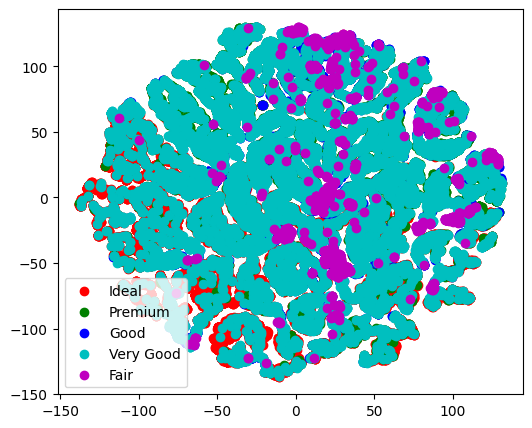

In [8]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for t-SNE
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# Plot the results
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(range(10), colors, diamonds['cut'].unique()):
    plt.scatter(X_2d[diamonds['cut'] == label, 0], X_2d[diamonds['cut'] == label, 1], c=c, label=label)
plt.legend()
plt.show()
